In [1]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [109]:
subj_df = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/dataframes/nsdsyn/binned/binned-ecc-0.5-4_nbin-log3_dset-nsdsyn_subj02_roi-V1_vs-pRFcenter.csv')


In [110]:
subj_df.names.unique()

array(['annulus', 'forward spiral', 'pinwheel', 'reverse spiral'],
      dtype=object)

In [46]:
subj_df.keys()

Index(['stim_idx', 'image_idx', 'names', 'w_r', 'w_a', 'phase', 'class_idx',
       'freq_lvl', 'voxel', 'task', 'betas', 'eccentricity', 'angle', 'size',
       'visualrois', 'vroinames', 'eccrois', 'local_sf', 'local_ori', 'hemi',
       'subj'],
      dtype='object')

In [47]:
bin_list, bin_labels = tuning.get_bin_labels(0.5, 4, 'log3')
subj_df['ecc_bin'] = tuning.bin_ecc(subj_df['eccentricity'], bin_list, bin_labels)

In [49]:
bin_df = tuning.summary_stat_for_ecc_bin(subj_df,
                                to_group=['ecc_bin','freq_lvl','names'],
                                to_bin=['betas','local_sf'], central_tendency='mean')

In [56]:
bin_df = bin_df.query('~names.str.contains("intermediate").values')

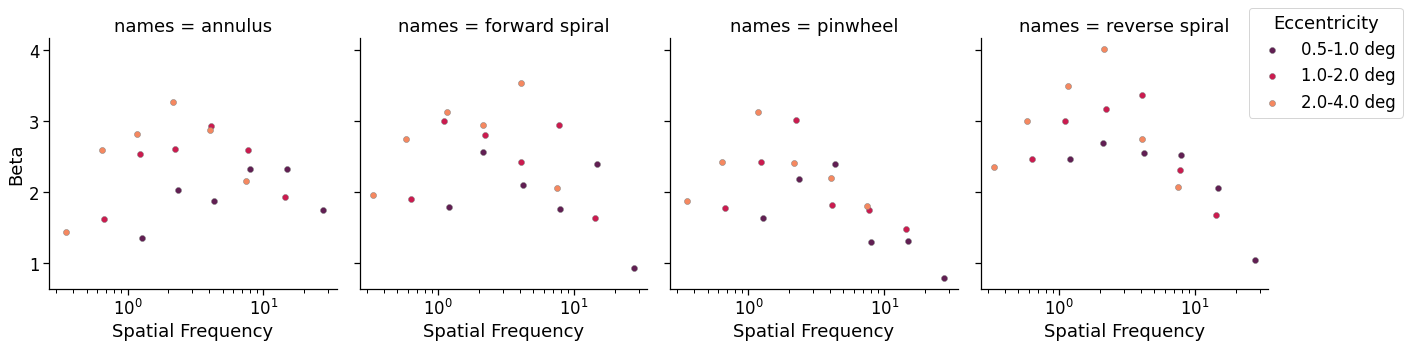

In [55]:
tuning.plot_datapoints(bin_df.query('~names.str.contains("intermediate").values'), save_fig=False)

In [57]:
c_df = bin_df.query('names == "pinwheel" & ecc_bin == "0.5-1.0 deg"')
my_dataset = tuning.LogGaussianTuningDataset(c_df)
my_model = tuning.LogGaussianTuningModel()

In [96]:
tuning.fit_tuning_curves(my_model, my_dataset, max_epoch=5)

**epoch no.0 loss: 0.068 

Model's state_dict:
slope 	 tensor([2.0647])
mode 	 tensor([2.6129])
sigma 	 tensor([2.4890])
Model's state_dict:
slope 	 tensor([2.0646])
mode 	 tensor([2.6130])
sigma 	 tensor([2.4889])
Model's state_dict:
slope 	 tensor([2.0645])
mode 	 tensor([2.6131])
sigma 	 tensor([2.4888])
Model's state_dict:
slope 	 tensor([2.0646])
mode 	 tensor([2.6132])
sigma 	 tensor([2.4887])
Model's state_dict:
slope 	 tensor([2.0646])
mode 	 tensor([2.6133])
sigma 	 tensor([2.4886])
**epoch no.5: Finished! final model params...
 {'slope': 2.064558506011963, 'mode': 2.6132099628448486, 'sigma': 2.4886889457702637}

Elapsed time: 0.01 sec 



(   epoch      loss
 0      0  0.067834
 1      1  0.067831
 2      2  0.067827
 3      3  0.067823
 4      4  0.067820,
    epoch     slope     mode     sigma
 0      0  2.064561  2.61281  2.489089
 1      1  2.064661  2.61291  2.488989
 2      2  2.064594  2.61301  2.488889
 3      3  2.064548  2.61311  2.488789
 4      4  2.064559  2.61321  2.488689)

In [97]:
new_model = tuning.LogGaussianTuningModel()
new_model.load_state_dict(torch.load('/Users/jh7685/Documents/test.pt'))
new_model.eval()


LogGaussianTuningModel()

In [100]:
new_model.mode

Parameter containing:
tensor([2.6133], requires_grad=True)

In [92]:
tuning.fit_tuning_curves_for_each_bin(c_df.ecc_bin.unique(), c_df, learning_rate=1e-4, max_epoch=100, print_every=25,anomaly_detection=False, amsgrad=False, eps=1e-8)


**epoch no.0 loss: 2.758 

**epoch no.24 loss: 2.755 

**epoch no.49 loss: 2.752 

**epoch no.74 loss: 2.749 

**epoch no.99 loss: 2.746 

**epoch no.100: Finished! final model params...
 {'slope': 0.12145503610372543, 'mode': 0.784354031085968, 'sigma': 1.3606019020080566}

Elapsed time: 0.04 sec 



(        ecc_bin  epoch      loss
 0   0.5-1.0 deg      0  2.758302
 1   0.5-1.0 deg      1  2.758180
 2   0.5-1.0 deg      2  2.758058
 3   0.5-1.0 deg      3  2.757936
 4   0.5-1.0 deg      4  2.757814
 ..          ...    ...       ...
 95  0.5-1.0 deg     95  2.746472
 96  0.5-1.0 deg     96  2.746345
 97  0.5-1.0 deg     97  2.746217
 98  0.5-1.0 deg     98  2.746090
 99  0.5-1.0 deg     99  2.745962
 
 [100 rows x 3 columns],
         ecc_bin  epoch     slope      mode     sigma
 0   0.5-1.0 deg      0  0.111522  0.774331  1.350567
 1   0.5-1.0 deg      1  0.111622  0.774431  1.350667
 2   0.5-1.0 deg      2  0.111722  0.774531  1.350767
 3   0.5-1.0 deg      3  0.111822  0.774631  1.350867
 4   0.5-1.0 deg      4  0.111922  0.774731  1.350967
 ..          ...    ...       ...       ...       ...
 95  0.5-1.0 deg     95  0.121052  0.783943  1.360190
 96  0.5-1.0 deg     96  0.121153  0.784046  1.360293
 97  0.5-1.0 deg     97  0.121254  0.784148  1.360396
 98  0.5-1.0 deg     98  

In [72]:
a_model.eval()


LogGaussianTuningModel()

In [101]:
def _get_bin_number(enum):
    only_num = int(enum.replace('log', ''))
    return [k for k in np.arange(1,only_num+1)]
enum = 'log4'

_get_bin_number(enum)

[1, 2, 3, 4]